# STAT TESTS FOR SHOP_AMOUNT 

Another important target variable which can be used for contributing to overall shopping experience is the shopping amount. More shopping is made the more money stores make. Thus, here we’ll closely examine the relation of shopping amount with other variables, later build a model based on our analysis.  For this purpose, we’ll carry out statistical test on both continuous variables and categorical variables and analyze their response on the cases of shopping amount.

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

# import statmodels
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
import seaborn as sns
import scikit_posthocs as sp

# import our utility functions
from modules.utils import create_2cat_table, create_1cat_table
from modules.StatUtils import *

# init statt utils class.
statUtils = StatUtils()

### Load data

In [3]:
# load data
data = pd.read_csv('dataset/Dataset_heart rate_retail stores.csv')

data.columns

Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 23 columns):
Id                                165 non-null int64
age                               165 non-null int64
gender                            165 non-null object
BMI                               165 non-null float64
sleeping_time                     165 non-null float64
sporting_activity_(h/week)        165 non-null float64
daytime                           165 non-null object
outdoor_temperature               165 non-null int64
shopping_cart                     165 non-null object
attendants                        165 non-null object
shopping_frequency                165 non-null object
cash_point                        165 non-null object
shopping_amount                   165 non-null object
weekday                           165 non-null object
smoking                           165 non-null int64
ex_max                            165 non-null int64
ex_min                           

# TESTS


Shopping amount has four classes, named “less”, “normal”, “bag full” and “heavy” accordingly. In order to understand the effect of other variables on shopping amount, we’ll carry out some parametric and non-parametric tests for analyzing the differences amount the group means. When we do parametric test, such as Anova, it’s important that the number of observation for each group is around the same number.  However, we can see that shopping amount classes are little unbalanced, where “less”, “normal”, “bag full” and “heavy” have 61, 58, 18, 28 observations respectively. Thus, as “bag full” and “heavy” have similar meaning and less number of observations, we’ll pool them together into “much” for ensuring the result of parametric test. 
Moreover, for the parameter test we clear all the outliers using IQR approach and transform the distribution of original response values using Gaussian or Log transformation (depending of the original distributions) If they don’t follow the normal distribution.

# A. ON CONTINIOUS VARS

Here we'll test the difference on shopping amounts on various continuous variables.

### STAT TESTS FOR CONTINUOUS DATA

We have different continuous variables such as hr_min, min_time, sleeping time, etc. For this variables we’ll conduct parametric tests Anova to see whether means of shopping group significantly varies from each other. If they do so, the we’ll use Tukey HSD to understand, exactly which parameters are different. For these parametric tests following assumptions we’ll be checked.

*	Residuals of each factor level is normally distributed
*	Independence of factors.
*	Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal.

However, if the assumptions of the Anova test don’t hold, then we’ll use some other non-paramedic test such as Kruskal-Wallis. Later in order find where difference exists amount groups will use pairwise comparison test Conver’s post hoc to find where differences lies.

In [5]:
Counter(data['shopping_amount'])

Counter({'less': 61, 'normal': 58, 'bag full': 18, 'heavy': 28})

When we do annova it's important that the number of observation for each group is around same nummmer. We can see from the above counter that "bag full" and "heavy" categories have less number of observation comparing with that of "less" and "normal". Thus, as "bag full" and "heady" are the categories of the same context, we'll pool them under the name "big"

In [6]:
# before pooling
Counter(data['shopping_amount'])

Counter({'less': 61, 'normal': 58, 'bag full': 18, 'heavy': 28})

In [7]:
data.loc[(data.shopping_amount == "bag full") | (data.shopping_amount == "heavy")\
         , "shopping_amount"] = "much"

In [8]:
# after pooling 
Counter(data['shopping_amount'])

Counter({'less': 61, 'normal': 58, 'much': 46})

#### some extra util functions

In [9]:
def check_anova_assumptions(lm, categorical_var, df):
    
    '''
    for checking anova assumptions all together (independence, homogenity, normality)
    
    inputs:
        lm: fitted linear model
        categorical_var: name of response varaible
        df: panda dfframe
    '''

    # homogenity test
    F, pvalue = stats.bartlett(
                           df[df['shopping_amount']=='less'][categorical_var], 
                           df[df['shopping_amount']=='normal'][categorical_var],
                           df[df['shopping_amount']=='heavy'][categorical_var])
    
    tmp_txt =  '\nHomogenit Test\nF: %.4f p: %.4f\n' %(F, pvalue)
    if pvalue>0.05: tmp_txt=tmp_txt+"p-values is significant, thus homogenity holds\n"
    else:  tmp_txt=tmp_txt+"p-values is non-significant, thus homogenity don't hold\n"
        
    print(tmp_txt)
    
    # Shaprio-Wild//qq plot test to check the normal distribution of residuals    
    F, pvalue  = stats.shapiro(lm.resid)
    
    tmp_txt =  '\nShaprio-Wild Test\nF: %.4f p: %.4f\n' %(F, pvalue)
    if pvalue>0.05: tmp_txt=tmp_txt+"p-values is significant, thus residuals are normally distributed"
    else:  tmp_txt=tmp_txt+"p-values is non-significant, thus normality of residuals don't hold"

    print(tmp_txt)
    fig = sm.qqplot(lm.resid, line='s')
    plt.show()
    
    # independence test
    print("\nIndependence test")
    statUtils.independence_test(lm)

Now, we're good to go!

# A.1. age ~ shopping_amount

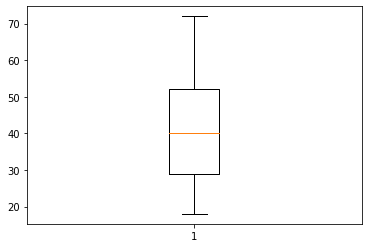

In [10]:
data_tmp = data.copy()

# remove outliers and check distribution for age
plt.boxplot(x=data_tmp['age'])
plt.show()

no outliers, leave it like this.

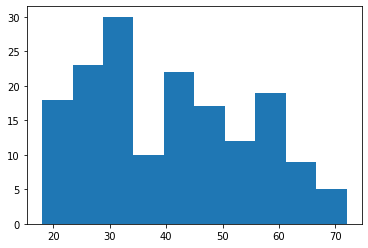

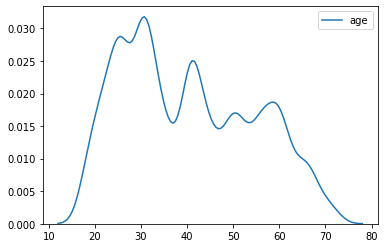

In [11]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['age'])
plt.show()

sns.kdeplot(data_tmp['age'], cumulative=False, bw=2)

As we can see our traget data don't follow the normal distribution, so we've to apply gaussian transfromation on our data for making it valible for anova test.

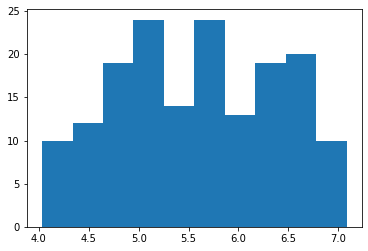

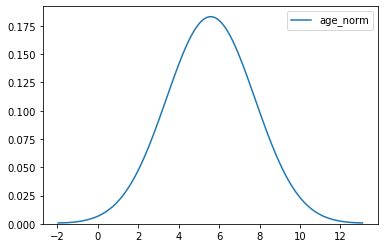

In [12]:
# gaussian transformation
data_tmp['age_norm'], fitted_lambda = stats.boxcox(data_tmp['age'])


# AFTER TRANSFORMATION
plt.hist(data_tmp['age_norm'])
plt.show()

# plot after transformation
sns.kdeplot(data_tmp['age_norm'], cumulative=False, bw=2)

In [13]:
create_1cat_table(data_tmp, 'shopping_amount', 'age_norm')

+-------------------+-----+------------+------------+
| shopping_amount   |   N |   age_norm |   age_norm |
|                   |     |       mean |        std |
+===================+=====+============+============+
| less              |  61 |       5.67 |       0.82 |
+-------------------+-----+------------+------------+
| much              |  46 |       5.44 |       0.83 |
+-------------------+-----+------------+------------+
| normal            |  58 |       5.6  |       0.76 |
+-------------------+-----+------------+------------+


In [14]:
lm = smf.ols('age_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9677 p: 0.0007
p-values is non-significant, thus normality of residuals don't hold


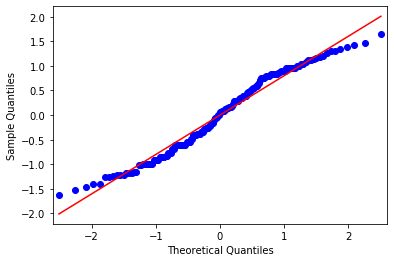


Independence test


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


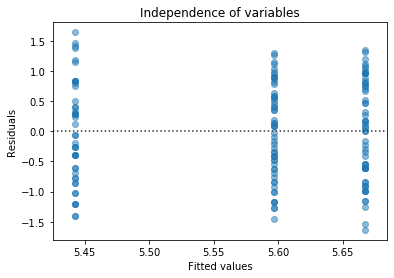

In [15]:
check_anova_assumptions(lm, 'age_norm', data_tmp)

Because the normality of residuals doesn't hold, we'll use non-parametric Kruskal–Wallis H test.


##  Kruskal–Wallis

In [16]:
# group original data
df = [data_tmp.loc[group, 'age'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-values %.4f' % pvalue)

p-values 0.3742


P value is p>0.37, thus we accept the null hypothesis that the population medians of all of the groups are equal. With other words, that means tha sopping amount don't vary show upon ages.

# A.2. sleeping_time ~ shopping_amount

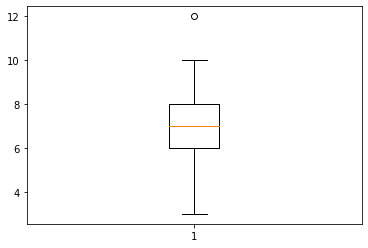

In [17]:
data_tmp = data.copy()
# check outliers
plt.boxplot(x=data_tmp['sleeping_time'])
plt.show()

In [18]:
# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'sleeping_time')

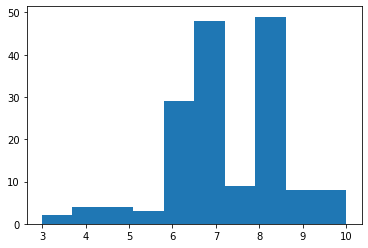

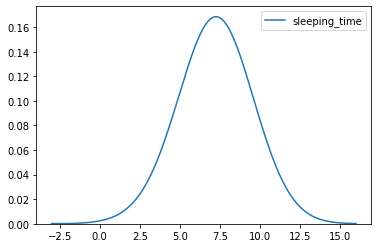

In [19]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['sleeping_time'])
plt.show()

sns.kdeplot(data_tmp['sleeping_time'], cumulative=False, bw=2)

Sleeping time follows the normal distribution, thus we'll keep it like that.

In [20]:
create_1cat_table(data_tmp, 'shopping_amount', 'sleeping_time')

+-------------------+-----+-----------------+-----------------+
| shopping_amount   |   N |   sleeping_time |   sleeping_time |
|                   |     |            mean |             std |
+===================+=====+=================+=================+
| less              |  61 |            7.15 |            1.17 |
+-------------------+-----+-----------------+-----------------+
| much              |  46 |            7.32 |            1.31 |
+-------------------+-----+-----------------+-----------------+
| normal            |  57 |            7.17 |            1.39 |
+-------------------+-----+-----------------+-----------------+


In [21]:
lm = smf.ols('sleeping_time ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9555 p: 0.0000
p-values is non-significant, thus normality of residuals don't hold


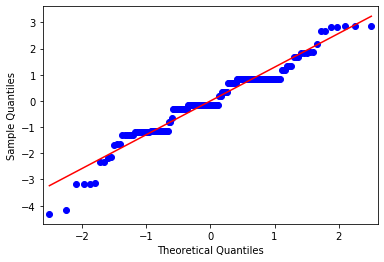


Independence test


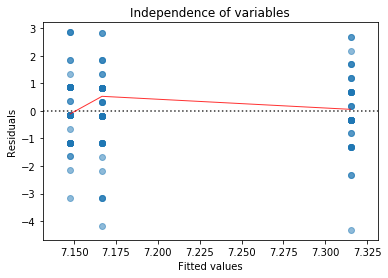

In [22]:
check_anova_assumptions(lm, 'sleeping_time', data_tmp)

We can see that both homogenity and independence of varaibles are not met. Thus, we'll use non-parametric aproach agian.

##  Kruskal–Wallis

In [23]:
# group original data
df = [data_tmp.loc[group, 'sleeping_time'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-values %.4f' % pvalue)

p-values 0.6131


With p value is p>0.61, we conclude that null hypothesis that the population medians of all of the groups are equal is right, and sleeping time doen't affect shopping amount.

# A.3. sporting_activity_(h/week) ~ shopping_amount

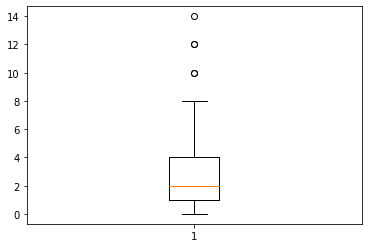

In [24]:
data_tmp = data.copy()
# raname shopping duration (in minutes) for easy handling
data_tmp=data_tmp.rename(columns = {'sporting_activity_(h/week)':'sport_dur'})

# check outliers
plt.boxplot(data_tmp['sport_dur'])
plt.show()

In [25]:
## replace <=0 values with 0.1
data_tmp.loc[data_tmp['sport_dur'] <= 0, 'sport_dur'] = 0.1

# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'sport_dur')

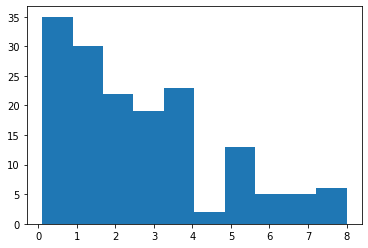

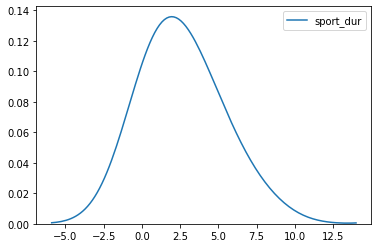

In [26]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['sport_dur'])
plt.show()

sns.kdeplot(data_tmp['sport_dur'], cumulative=False, bw=2)

Data is skewed, thus do log transfomation.

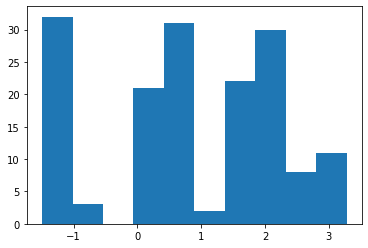

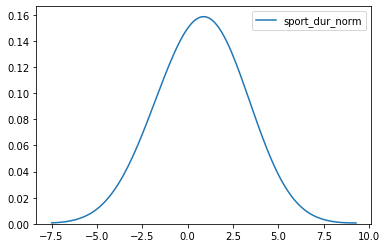

In [27]:
# gaussian transformation
data_tmp['sport_dur_norm'], _ = stats.boxcox(data_tmp['sport_dur'])


# # AFTER TRANSFORMATION
plt.hist(data_tmp['sport_dur_norm'])
plt.show()

sns.kdeplot(data_tmp['sport_dur_norm'], cumulative=False, bw=2)

In [28]:
create_1cat_table(data_tmp, 'shopping_amount', 'sport_dur_norm')

+-------------------+-----+------------------+------------------+
| shopping_amount   |   N |   sport_dur_norm |   sport_dur_norm |
|                   |     |             mean |              std |
+===================+=====+==================+==================+
| less              |  60 |             0.8  |             1.46 |
+-------------------+-----+------------------+------------------+
| much              |  44 |             0.6  |             1.36 |
+-------------------+-----+------------------+------------------+
| normal            |  56 |             0.84 |             1.45 |
+-------------------+-----+------------------+------------------+


In [29]:
lm = smf.ols('sport_dur_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9395 p: 0.0000
p-values is non-significant, thus normality of residuals don't hold


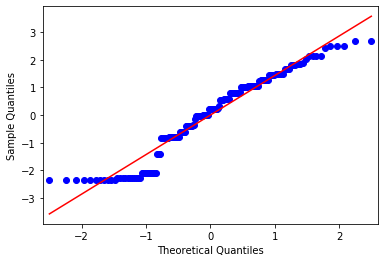


Independence test


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


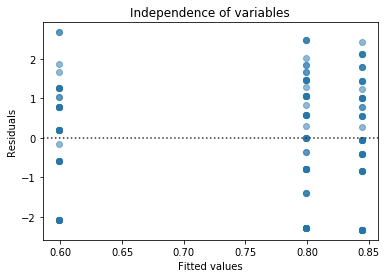

In [30]:
check_anova_assumptions(lm, 'sport_dur_norm', data_tmp)

The normality of residuals dosn't hold.

##  Kruskal–Wallis

In [31]:
# group original data
df = [data_tmp.loc[group, 'sport_dur'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-values %.4f' % pvalue)

p-values 0.6209


With p value is p>0.62, we conclude that null hypothesis that the population medians of all of the groups are equal is right, and sport activity time doen't affect shopping amount.

# A.4. BMI ~ shopping_amount

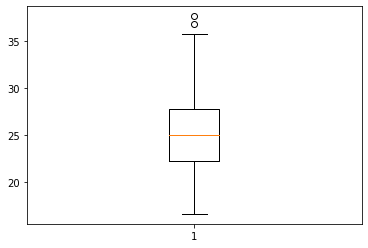

In [32]:
data_tmp = data.copy()

# check outliers
plt.boxplot(data_tmp['BMI'])
plt.show()

In [33]:
# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'BMI')

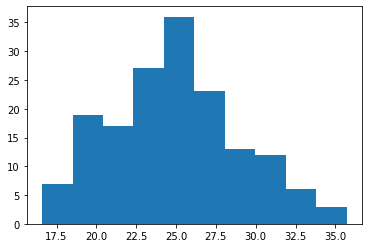

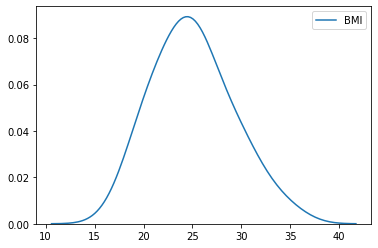

In [34]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['BMI'])
plt.show()

sns.kdeplot(data_tmp['BMI'], cumulative=False, bw=2)

It follows the normal distribution, so we leave it like this.

In [35]:
create_1cat_table(data_tmp, 'shopping_amount', 'BMI')

+-------------------+-----+--------+-------+
| shopping_amount   |   N |    BMI |   BMI |
|                   |     |   mean |   std |
+===================+=====+========+=======+
| less              |  60 |  25.54 |  3.91 |
+-------------------+-----+--------+-------+
| much              |  45 |  24.5  |  4.15 |
+-------------------+-----+--------+-------+
| normal            |  58 |  24.93 |  3.94 |
+-------------------+-----+--------+-------+


In [36]:
lm = smf.ols('BMI ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9834 p: 0.0480
p-values is non-significant, thus normality of residuals don't hold


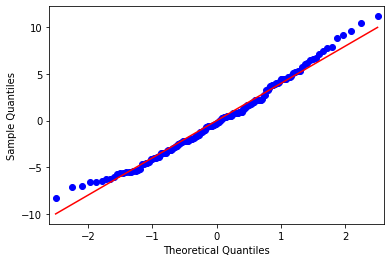


Independence test


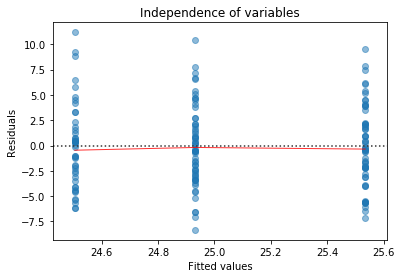

In [37]:
check_anova_assumptions(lm, 'BMI', data_tmp)

As the assumptions are not meet, we'll use non-parametric test.

##  Kruskal–Wallis

In [38]:
# group original data
df = [data_tmp.loc[group, 'BMI'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-value %.4f' % pvalue)

p-value 0.3237


With a p value siginificnat, we accepct that shopping amount is not effected by BMIs.

# A.5. outdoor_temeperature ~ shopping_amount

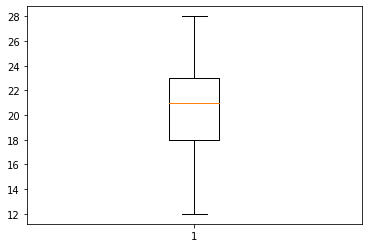

In [39]:
data_tmp = data.copy()

# check outliers
plt.boxplot(data_tmp['outdoor_temperature'])
plt.show()

No outlier!

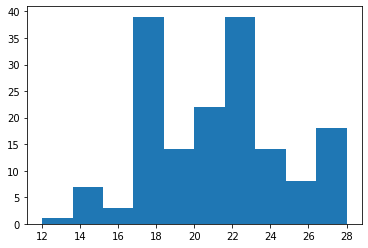

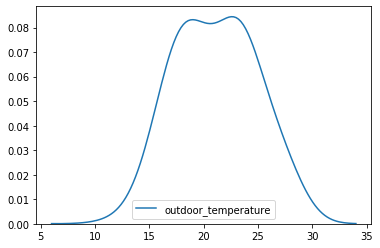

In [40]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['outdoor_temperature'])
plt.show()

sns.kdeplot(data_tmp['outdoor_temperature'], cumulative=False, bw=2)

We'll accepct that it follows normal distribution.

In [41]:
create_1cat_table(data_tmp, 'shopping_amount', 'outdoor_temperature')

+-------------------+-----+-----------------------+-----------------------+
| shopping_amount   |   N |   outdoor_temperature |   outdoor_temperature |
|                   |     |                  mean |                   std |
+===================+=====+=======================+=======================+
| less              |  61 |                 21.64 |                  3.73 |
+-------------------+-----+-----------------------+-----------------------+
| much              |  46 |                 21.04 |                  3.56 |
+-------------------+-----+-----------------------+-----------------------+
| normal            |  58 |                 20.55 |                  3.22 |
+-------------------+-----+-----------------------+-----------------------+


In [42]:
lm = smf.ols('outdoor_temperature ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9683 p: 0.0008
p-values is non-significant, thus normality of residuals don't hold


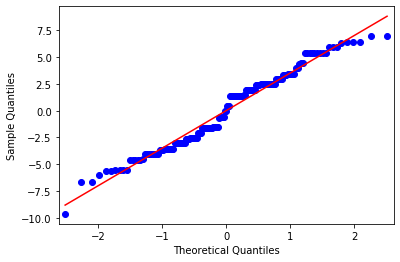


Independence test


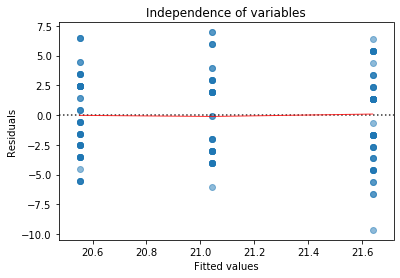

In [43]:
check_anova_assumptions(lm, 'outdoor_temperature', data_tmp)

As the assumptions are not meet, we'll use non-parametric test.

##  Kruskal–Wallis

In [44]:
# group original data
df = [data_tmp.loc[group, 'outdoor_temperature'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-value %.4f' % pvalue)

p-value 0.2279


With a p value siginificnat, we conclude that shopping amounts don't differ upon BMIs.

# A.6. ex_max ~ shopping_amount 

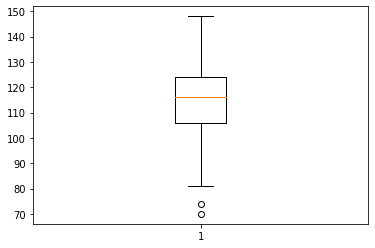

In [45]:
data_tmp = data.copy()

# check outliers
plt.boxplot(data_tmp['ex_max'])
plt.show()

In [46]:
# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'ex_max')

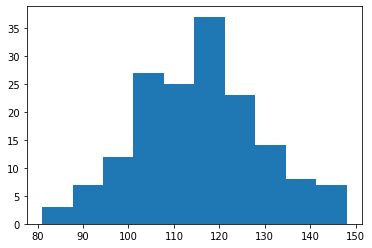

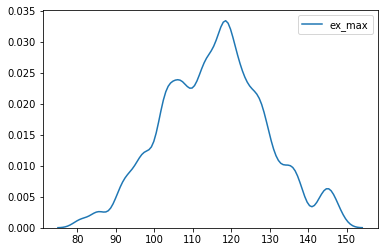

In [47]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['ex_max'])
plt.show()

sns.kdeplot(data_tmp['ex_max'], cumulative=False, bw=2)

We'll it looks like it follows normal distribution, but we better normmalize it.

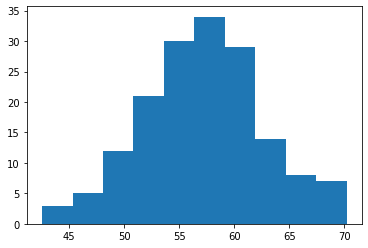

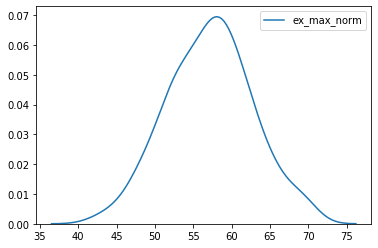

In [48]:
# gaussian transformation
data_tmp['ex_max_norm'], _ = stats.boxcox(data_tmp['ex_max'])


# # AFTER TRANSFORMATION
plt.hist(data_tmp['ex_max_norm'])
plt.show()

sns.kdeplot(data_tmp['ex_max_norm'], cumulative=False, bw=2)

In [49]:
create_1cat_table(data_tmp, 'shopping_amount', 'ex_max_norm')

+-------------------+-----+---------------+---------------+
| shopping_amount   |   N |   ex_max_norm |   ex_max_norm |
|                   |     |          mean |           std |
+===================+=====+===============+===============+
| less              |  60 |         57.04 |          6.27 |
+-------------------+-----+---------------+---------------+
| much              |  45 |         56.84 |          5.26 |
+-------------------+-----+---------------+---------------+
| normal            |  58 |         57.52 |          4.79 |
+-------------------+-----+---------------+---------------+


In [50]:
lm = smf.ols('ex_max_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9952 p: 0.8736
p-values is significant, thus residuals are normally distributed


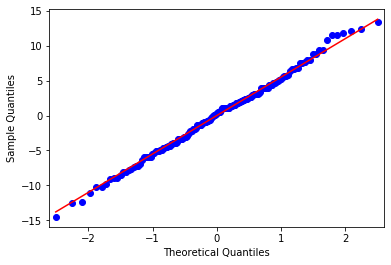


Independence test


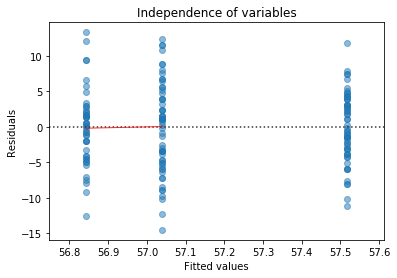

In [51]:
check_anova_assumptions(lm, 'ex_max_norm', data_tmp)

As all the assumptions are met now, finaly! We can do ANOVa test.

### Anova

In [52]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
shopping_amount,2.0,12.761917,6.380958,0.206937,0.813288
Residual,160.0,4933.634286,30.835214,NaN,NaN


Anova suggest us that shopping amount is not affected by ex_max. 

# A.7. hr_max ~ shopping amount

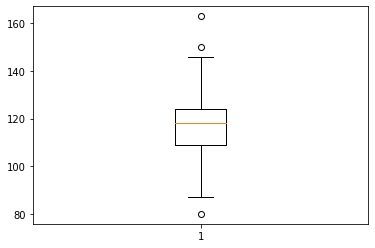

In [53]:
data_tmp = data.copy()

# check outliers
plt.boxplot(data_tmp['hr_max'])
plt.show()

In [54]:
# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'hr_max')

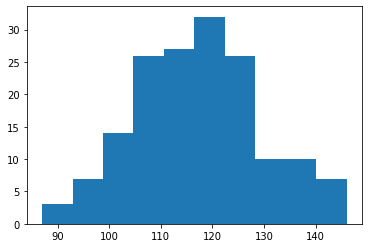

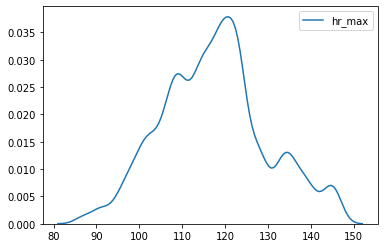

In [55]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['hr_max'])
plt.show()

sns.kdeplot(data_tmp['hr_max'], cumulative=False, bw=2)

We'll it looks like it follows normal distribution, but we better normmalize it.

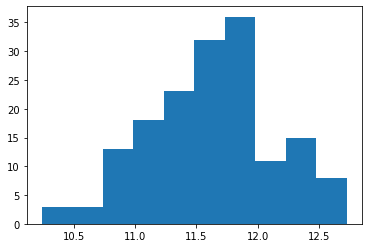

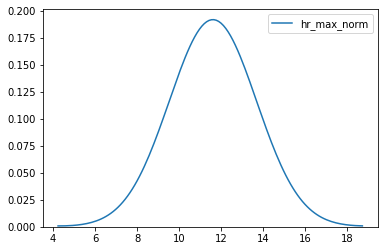

In [56]:
# gaussian transformation
data_tmp['hr_max_norm'], _ = stats.boxcox(data_tmp['hr_max'])


# # AFTER TRANSFORMATION
plt.hist(data_tmp['hr_max_norm'])
plt.show()

sns.kdeplot(data_tmp['hr_max_norm'], cumulative=False, bw=2)

In [57]:
create_1cat_table(data_tmp, 'shopping_amount', 'hr_max_norm')

+-------------------+-----+---------------+---------------+
| shopping_amount   |   N |   hr_max_norm |   hr_max_norm |
|                   |     |          mean |           std |
+===================+=====+===============+===============+
| less              |  59 |         11.49 |          0.55 |
+-------------------+-----+---------------+---------------+
| much              |  45 |         11.76 |          0.49 |
+-------------------+-----+---------------+---------------+
| normal            |  58 |         11.62 |          0.44 |
+-------------------+-----+---------------+---------------+


In [58]:
lm = smf.ols('hr_max_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9931 p: 0.6377
p-values is significant, thus residuals are normally distributed


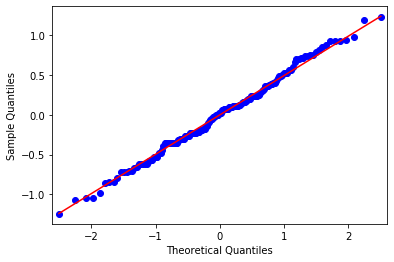


Independence test


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


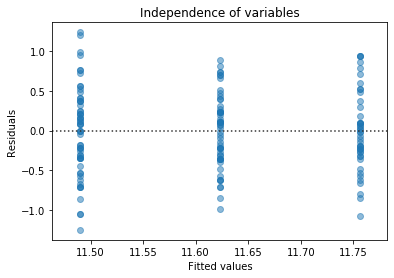

In [59]:
check_anova_assumptions(lm, 'hr_max_norm', data_tmp)

As all the assumptions are met now, finaly! We can do ANOVa test.

## Anova

In [60]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
shopping_amount,2.0,1.831022,0.915511,3.655328,0.02805
Residual,159.0,39.823023,0.250459,NaN,NaN


As the ANOVA tels that effect of hr_max on shopping amounts differs significanly. Now using Tukey HSD we can find which groups are significantly different from each other

## Tukey HSD

In [61]:
print(pairwise_tukeyhsd(data_tmp['hr_max'], data_tmp['shopping_amount'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  less   much   6.3623 0.0236  0.6914 12.0332   True
  less normal   3.0275 0.3699 -2.2706  8.3256  False
  much normal  -3.3349 0.3514 -9.0269  2.3572  False
----------------------------------------------------


We can see that "heavy" and "less" shopping amount vary depend on hr_max (the maximum heart rate during shopping). Using this infomration we can conclude that, when customers get excited about sth, they do more shopping.

# A.8. max_time ~ shopping_amount

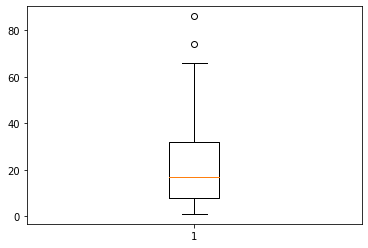

In [62]:
data_tmp = data.copy()

# check outliers
plt.boxplot(data_tmp['max_time'])
plt.show()

In [63]:
# remove outliersb
data_tmp = statUtils.remove_outliers(data_tmp, 'max_time')

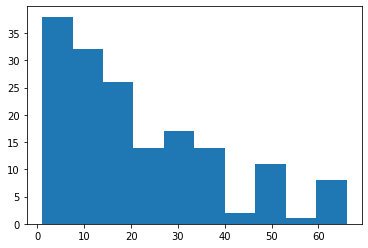

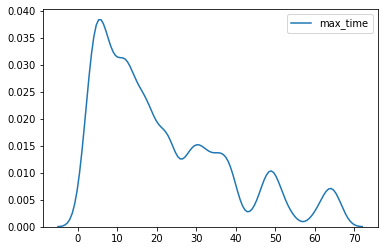

In [64]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['max_time'])
plt.show()

sns.kdeplot(data_tmp['max_time'], cumulative=False, bw=2)

We max_time obviously doesn't follows normal distribution, but we better normalize it.

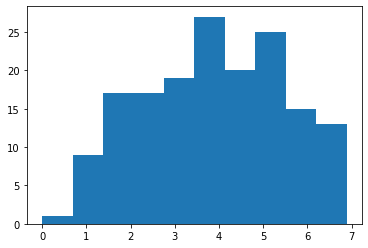

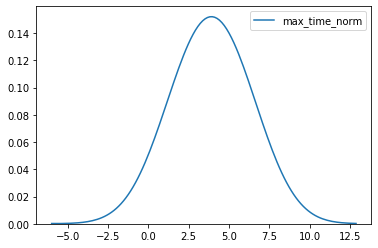

In [65]:
# gaussian transformation
data_tmp['max_time_norm'], _ = stats.boxcox(data_tmp['max_time'])


# # AFTER TRANSFORMATION
plt.hist(data_tmp['max_time_norm'])
plt.show()

sns.kdeplot(data_tmp['max_time_norm'], cumulative=False, bw=2)

In [66]:
create_1cat_table(data_tmp, 'shopping_amount', 'max_time_norm')

+-------------------+-----+-----------------+-----------------+
| shopping_amount   |   N |   max_time_norm |   max_time_norm |
|                   |     |            mean |             std |
+===================+=====+=================+=================+
| less              |  61 |            3.24 |            1.42 |
+-------------------+-----+-----------------+-----------------+
| much              |  44 |            4.71 |            1.41 |
+-------------------+-----+-----------------+-----------------+
| normal            |  58 |            3.96 |            1.6  |
+-------------------+-----+-----------------+-----------------+


In [67]:
lm = smf.ols('max_time_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9696 p: 0.0012
p-values is non-significant, thus normality of residuals don't hold


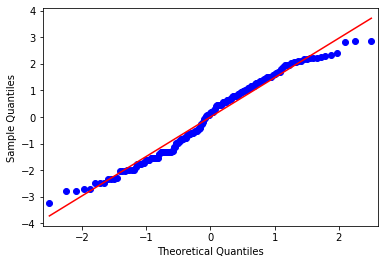


Independence test


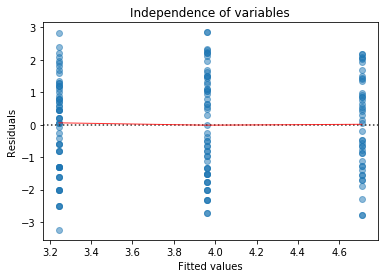

In [68]:
check_anova_assumptions(lm, 'max_time_norm', data_tmp)

We can see that normality of residuals and independence of varaibles don't hold. Thus, we'll use non-parametric test.

##  Kruskal–Wallis

In [69]:
# group original data
df = [data_tmp.loc[group, 'max_time'].values for group in data_tmp.groupby('shopping_amount').groups.values()]

In [70]:
# group original data
df = [data.loc[group, 'max_time'].values for group in data.groupby('shopping_amount').groups.values()]

In [71]:
df

[array([ 8, 13, 13,  7,  1, 16, 11,  4, 23,  8, 12,  2, 19, 24, 15, 34,  7,
        15,  9, 23, 15, 17,  3, 22, 47, 36, 22,  5,  5,  5,  3,  3, 16, 12,
        18,  2, 20,  8, 30,  5,  5, 18, 13, 10,  4,  7, 15, 22, 18, 28,  5,
        12,  3, 39, 21, 17, 31, 27, 32,  4,  2], dtype=int64),
 array([18, 40, 10, 16, 31,  5, 66, 11, 32, 86, 17, 33, 66, 16, 29, 14, 38,
         5, 13, 11, 48, 27, 10, 13, 36, 47, 34, 38, 20, 64, 20,  7,  9, 26,
        18, 60, 39, 23, 54, 19, 74, 62, 12, 63, 49, 50], dtype=int64),
 array([24, 26, 39, 12, 36,  8,  6,  4, 33, 15, 14,  5,  3, 44, 30, 10, 22,
         3, 38, 35, 64, 47,  8, 28, 32,  4, 20,  6, 51, 49, 11,  5,  5,  9,
        64, 17, 24,  7,  7, 36, 36, 29, 30, 52, 49,  7, 29, 13, 12, 23,  6,
        50, 10, 13,  8,  7,  4, 11], dtype=int64)]

In [72]:
# group original data
df = [data_tmp.loc[group, 'max_time'].values for group in data_tmp.groupby('shopping_amount').groups.values()]


_, pvalue = stats.kruskal(*df)

print('p-value %.4f' % pvalue)

p-value 0.0001


P value tells us we may reject the null hypothesis that the population medians of all of the groups are equal. To learn what shopping amount groups differ in their medians we need to use Conover's post hoc test. 

## Conover's post hoc

In [73]:
sp.posthoc_conover(data_tmp, val_col='max_time', group_col='shopping_amount', p_adjust = 'holm')

,less,much,normal
less,-1.000000,0.000016,0.029754
much,0.000016,-1.000000,0.029754
normal,0.029754,0.029754,-1.000000


Pairwise comparisons show that we may reject the null hypothesis (p < 0.05) for each pair of shopping amount and conclude that "heavy" and "less" groups differ uppon max_time.

# A.8.2 min_time ~ shopping_amount

In [74]:
# remove outliersb
data_tmp = statUtils.remove_outliers(data_tmp, 'min_time')

##  Kruskal–Wallis

In [75]:
# group original data
df = [data_tmp.loc[group, 'min_time'].values for group in data_tmp.groupby('shopping_amount').groups.values()]
_, pvalue = stats.kruskal(*df)

print('p-value %.4f' % pvalue)

p-value 0.0145


P value tells us we may reject the null hypothesis that the population medians of all of the groups are equal. To learn what shopping amount groups differ in their medians we need to use Conover's post hoc test. 

## Conover's post hoc

In [76]:
sp.posthoc_conover(data_tmp, val_col='min_time', group_col='shopping_amount', p_adjust = 'holm')

,less,much,normal
less,-1.000000,0.122056,0.013196
much,0.122056,-1.000000,0.449535
normal,0.013196,0.449535,-1.000000


In [77]:
create_1cat_table(data_tmp, 'shopping_amount', 'min_time')

+-------------------+-----+------------+------------+
| shopping_amount   |   N |   min_time |   min_time |
|                   |     |       mean |        std |
+===================+=====+============+============+
| less              |  61 |      11.34 |       8.71 |
+-------------------+-----+------------+------------+
| much              |  41 |      15.88 |      11.9  |
+-------------------+-----+------------+------------+
| normal            |  55 |      17.07 |      10.94 |
+-------------------+-----+------------+------------+


Pairwise comparisons show that we may reject the null hypothesis (p < 0.05) for each pair of shopping amount and conclude that ("heavy" vs "less"), ("less" vs "normal") and ("normal" and less") groups differ uppon min_time.


min_time is the time during shopping when participant reached a minimum heart rate. From 8.1 and 8.2 test we can see that if customers spend more time inside and get surprises/excited eventually, they'll eventually do more grocery, this is somehow the butterfly effect during the shopping.

# A.9. shopping_dur ~ shopping_amount

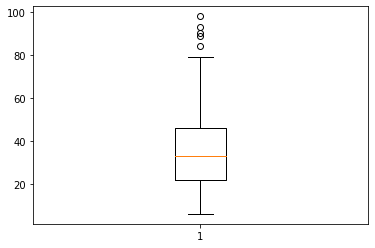

In [78]:
data_tmp = data.copy()
# raname shopping duration (in minutes) for easy handling
data_tmp=data_tmp.rename(columns = {'shopping duration (in minutes)':'shopping_dur'})

# check outliers
plt.boxplot(data_tmp['shopping_dur'])
plt.show()

In [79]:
# remove outliers
data_tmp = statUtils.remove_outliers(data_tmp, 'shopping_dur')

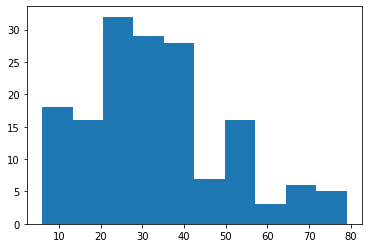

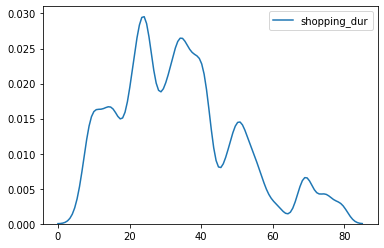

In [80]:
# BEFORE TRANSFORMATION
plt.hist(data_tmp['shopping_dur'])
plt.show()

sns.kdeplot(data_tmp['shopping_dur'], cumulative=False, bw=2)

It's obvious that our resonse var is not normally distributed.

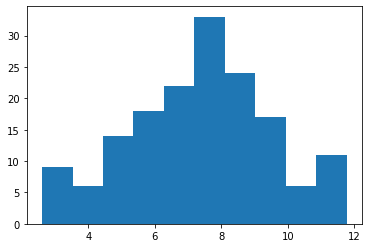

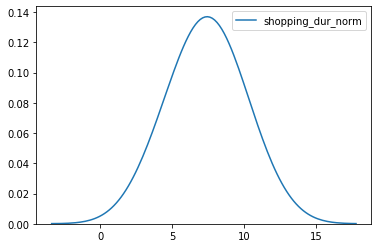

In [81]:
# gaussian transformation
data_tmp['shopping_dur_norm'], _ = stats.boxcox(data_tmp['shopping_dur'])


# # AFTER TRANSFORMATION
plt.hist(data_tmp['shopping_dur_norm'])
plt.show()

sns.kdeplot(data_tmp['shopping_dur_norm'], cumulative=False, bw=2)

In [82]:
create_1cat_table(data_tmp, 'shopping_amount', 'shopping_dur_norm')

+-------------------+-----+---------------------+---------------------+
| shopping_amount   |   N |   shopping_dur_norm |   shopping_dur_norm |
|                   |     |                mean |                 std |
+===================+=====+=====================+=====================+
| less              |  61 |                5.97 |                1.73 |
+-------------------+-----+---------------------+---------------------+
| much              |  42 |                8.56 |                1.58 |
+-------------------+-----+---------------------+---------------------+
| normal            |  57 |                7.93 |                1.82 |
+-------------------+-----+---------------------+---------------------+


In [83]:
lm = smf.ols('shopping_dur_norm ~ shopping_amount', data=data_tmp).fit()


Homogenit Test
F: nan p: nan
p-values is non-significant, thus homogenity don't hold


Shaprio-Wild Test
F: 0.9874 p: 0.1582
p-values is significant, thus residuals are normally distributed


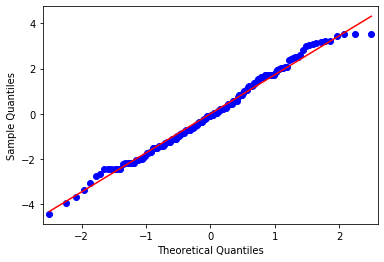


Independence test


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


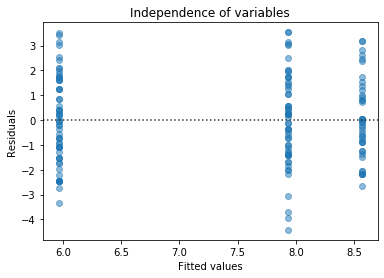

In [84]:
check_anova_assumptions(lm, 'shopping_dur_norm', data_tmp)

As all the assumptions of anova are met, we can do anova test! 

## Anova

In [85]:
sm.stats.anova_lm(lm, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
shopping_amount,2.0,198.162869,99.081435,32.66123,1.380164e-12
Residual,157.0,476.276777,3.033610,NaN,NaN


As the ANOVA tels that effect of shopping duration on shopping amount is important. Now using Tukey HSD we can find which groups are significantly different from each other

## Tukey Hsd

In [86]:
print(pairwise_tukeyhsd(data_tmp['shopping_dur_norm'], data_tmp['shopping_amount'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  less   much   2.5985  0.001  1.7721 3.4249   True
  less normal    1.967  0.001  1.2077 2.7263   True
  much normal  -0.6315 0.1788 -1.4696 0.2067  False
---------------------------------------------------


We can see that when customer spend more time inside they're more likely to shop a lot. It appears cutomers do more/normal shopping when they spend more time. Well, it's not that suprising.

# B. ON CATEGORICAL VARS

Chi-square test is a non-parametric (distribution-free) method used to compare the relationship between the two categorical (nominal) variables in a contingency table. Using this, we’ll try to understand whether two categorical variables are dependent or independent (thee is association between the two variables or not). If the assumptions of Chi-Square test don't hold, we'll use McNamara’s Test or simply doing pooling on some groups.

**Hypotheses**:
* Null hypotheses: The two categorical variables are independent (no association between the two variables)
* Alternative hypotheses: The two categorical variables are dependent (there is an association between the two variables)

**Assumptions**:

* expected frequencies should not be too small (usually > 5)
* independent observations


# B.1 shopping_cart ~ shopping_amount

In [87]:
table=pd.crosstab(data['shopping_cart'], data['shopping_amount'], )
table

shopping_amount,less,much,normal
shopping_cart,,,
no,38,18,10
yes,23,28,48


In [88]:
statUtils.chi_squared_test(table)

df=2

Expected values:

shopping_amount  less  much  normal
shopping_cart                      
no               24.4  18.4    23.2
yes              36.6  27.6    34.8

chi=25.1656, p-value=0.0000

At significance=0.050, reject null hypotheses: thus categorical variables are dependent


We can see that customers those takes shoping cart are doing more shopping.

# B.2 cash_point ~ shopping_amount

In [89]:
table=pd.crosstab(data['shopping_amount'], data['cash_point'], )
table

cash_point,free,full,normal
shopping_amount,,,
less,25,3,33
much,6,7,33
normal,15,2,41


#### Pooling

As the frequency for "full" is small (<5), it makes sense to pool it together with the "normal".

In [90]:
data_tmp = data.copy()

data_tmp.loc[(data_tmp.cash_point == "full") | (data_tmp.cash_point == "normal")\
         , "cash_point"] = "normal+"

table=pd.crosstab(data_tmp['shopping_amount'], data_tmp['cash_point'], )
table

cash_point,free,normal+
shopping_amount,,
less,25,36
much,6,40
normal,15,43


In [91]:
statUtils.chi_squared_test(table)

df=2

Expected values:

cash_point            free    normal+
shopping_amount                      
less             17.006061  43.993939
much             12.824242  33.175758
normal           16.169697  41.830303

chi=10.3627, p-value=0.0056

At significance=0.050, reject null hypotheses: thus categorical variables are dependent


We can see that when cashpoints are fully or normally occupied, people are prone to do more shopping, maybe that is because they don't want to spend more time waiting on the cashpoint instead walk around, eventually buy something.

# B.3 smoking ~ shopping_amount

In [92]:
table=pd.crosstab(data['shopping_amount'], data['smoking'], )
table

smoking,0,1
shopping_amount,,
less,40,21
much,29,17
normal,35,23


In [93]:
# chi squared
statUtils.chi_squared_test(table)

df=2

Expected values:

smoking                  0          1
shopping_amount                      
less             38.448485  22.551515
much             28.993939  17.006061
normal           36.557576  21.442424

chi=0.3489, p-value=0.8399

At significance=0.050, accept null hypotheses: thus categorical variables are independent


We can see that categorical varaibles are independent, that means being a smoker, or non-smoker don't have any effect on shopping amount.

# B.4 shopping_frequency  ~ shopping_amount

In [94]:
table=pd.crosstab(data['shopping_amount'], data['shopping_frequency'], )
table.T

shopping_amount,less,much,normal
shopping_frequency,,,
regularly,52,42,51
seldom,9,4,7


As the frequency for "seldom" is small, we'll use mcnemar test.

In [95]:
# mcnemar test
statUtils.mcnemar_test(table.T)

statistic=0.0000, p-value=1.0000

At significance=0.0500, accept null hypotheses: categories do not have impact on each other


McNemar's test suggest that going to shopping seldom or regularly doesn't have impact on shopping amount.

# B.5 attendants ~ shopping_amount

In [96]:
table=pd.crosstab(data['shopping_amount'], data['attendants'], )
table

attendants,family,family member,life partner,little child,no
shopping_amount,,,,,
less,1,5,13,1,41
much,7,5,18,2,14
normal,5,5,22,3,23


#### Pooling

We se that the frequency for all the attendats groups except "no" is small (<5), it makes sense to pool all of the as "yes" group. Doing so, we'll try to see wheter going alone or with someone has impact on shopping amount.

In [97]:
data_tmp = data.copy()

data_tmp.loc[data_tmp.attendants != "no", "attendants"] = "yes"

table=pd.crosstab(data_tmp['shopping_amount'], data_tmp['attendants'], )
table

attendants,no,yes
shopping_amount,,
less,41,20
much,14,32
normal,23,35


In [98]:
# chi squared
statUtils.chi_squared_test(table)

df=2

Expected values:

attendants              no        yes
shopping_amount                      
less             28.836364  32.163636
much             21.745455  24.254545
normal           27.418182  30.581818

chi=16.3134, p-value=0.0003

At significance=0.050, reject null hypotheses: thus categorical variables are dependent


As we can see that going shopping with the accompany of someone has an impact on the amount of shopping being made.

# B6. gender ~ shopping_amount

In [99]:
table=pd.crosstab(data['shopping_amount'], data['gender'], )
table

gender,female,male
shopping_amount,,
less,26,35
much,26,20
normal,36,22


In [100]:
# chi squared
statUtils.chi_squared_test(table)

df=2

Expected values:

gender              female       male
shopping_amount                      
less             32.533333  28.466667
much             24.533333  21.466667
normal           30.933333  27.066667

chi=4.7777, p-value=0.0917

At significance=0.050, accept null hypotheses: thus categorical variables are independent


Chi-squared test suggest us that the amount of shopping done desn't vary upon gender.

# B.7 reaching HRmax ~ shoppin_amount

In [101]:
table=pd.crosstab(data['shopping_amount'], data['reaching HRmax'], )
table

reaching HRmax,0,1
shopping_amount,,
less,37,24
much,15,31
normal,30,28


In [102]:
# chi squared
statUtils.chi_squared_test(table)

df=2

Expected values:

reaching HRmax           0          1
shopping_amount                      
less             30.315152  30.684848
much             22.860606  23.139394
normal           28.824242  29.175758

chi=8.3989, p-value=0.0150

At significance=0.050, reject null hypotheses: thus categorical variables are dependent


Test suggest that racing HRmax has an impact on shopping amount. This most probably because when people get more excited/happy during shopping they shop more.

# B.8 daytime ~ shoppin_amount

In [103]:
table=pd.crosstab(data['shopping_amount'], data['daytime'], )
table

daytime,evening,morning,noon
shopping_amount,,,
less,18,13,30
much,21,6,19
normal,18,8,32


In [104]:
# chi squared
statUtils.chi_squared_test(table)

df=4

Expected values:

daytime            evening   morning       noon
shopping_amount                                
less             21.072727  9.981818  29.945455
much             15.890909  7.527273  22.581818
normal           20.036364  9.490909  28.472727

chi=4.7595, p-value=0.3129

At significance=0.050, accept null hypotheses: thus categorical variables are independent


There is no dependence between daytime and shopping amount.

# B.9 weekday ~ shopping_amount

In [105]:
table=pd.crosstab(data['shopping_amount'], data['weekday'], )
table

weekday,friday,monday,saturday,thursday,tuesday,wednesday
shopping_amount,,,,,,
less,9,10,12,11,10,9
much,13,5,8,6,4,10
normal,13,8,14,13,6,4


#### Pooling

We see that the frequency for some groups is small (<5), it makes sense to pool all some of the group which may show a similar pattern. Thus we'll pool "friday" and "saturday" together as "weekend" and the rest as "weekday"

In [106]:
data_tmp = data.copy()

data_tmp.loc[(data_tmp.weekday == "friday") | (data_tmp.weekday == "saturday"), "weekday"] = "weekend"

data_tmp.loc[data_tmp.weekday != "weekend", "weekday"] = "weekday"

table=pd.crosstab(data_tmp['shopping_amount'], data_tmp['weekday'], )
table

weekday,weekday,weekend
shopping_amount,,
less,40,21
much,25,21
normal,31,27


In [107]:
# chi squared
statUtils.chi_squared_test(table)

df=2

Expected values:

weekday            weekday    weekend
shopping_amount                      
less             35.490909  25.509091
much             26.763636  19.236364
normal           33.745455  24.254545

chi=2.1820, p-value=0.3359

At significance=0.050, accept null hypotheses: thus categorical variables are independent


We can see that created weekday groups don't have an impact on shopping amount. This can be explained by the reason that although people have more time during weekends, they always need something to buy regardless of the day of the week. 